# [PyTorch入門 [公式Tutorial:DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZを読む]](https://qiita.com/north_redwing/items/30f9619f0ee727875250)



Training an image classifier  
We will do the following steps in order:  
- Load and normalizing the CIFAR10 training and test datasets using torchvision
- Define a Convolutional Neural Network
- Define a loss function
- Train the network on the training data
- Test the network on the test data

## 1. Loading and normalizing CIFAR10

transformには前処理の内容を記述しておきます. それをtorchvision.datasets.CIFAR10により読み込む際に渡すことで自分が望むような前処理を行ってくれます.

transforms.Composeで，データをロードした後に行う下処理の関数を構成します．transforms.Compose()内にlist形式で記述していきます.

ToTensor()は名前の通りデータをpytorchの定義するtorch.Tensorというテンソルに型を変更します．

transforms.Normalizeの引数がtorch.Tensorであることから，リストの初めから順に関数を実行してくのでしょう．

transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)は，引数の一つ目のタプルが　RGBの各チャンネルの平均を表し，二つ目のタプルが標準偏差を表します．これらの平均と標準偏差にあわせて正規化します．  

これで，データをpytorch用のテンソル型に変えて，正規化を行う関数を準備したことになります．

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Downloading https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz Files already downloaded and verified


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


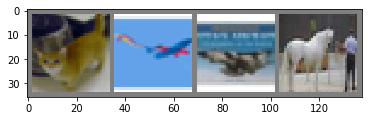

  cat plane plane horse


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



## 2. Define a Convolutional Neural Network

In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## 3. Define a Loss function and optimizer

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # criterion = 基準
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the Network

お待ちかねの学習になります.  
大まかな流れは,  
1. 勾配を初期化する
2. 順伝播する
3. lossを計算する
4. 逆誤差伝播する
5. パラメータを更新する  

という感じです.
公式のサイトには, enumerate(trainloader, 0)となっていますが, enumerateはdefaultで開始位置が0なので0を書く必要はありません.

In [9]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.182


Traceback (most recent call last):
  File "/opt/conda/envs/imazato1/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/conda/envs/imazato1/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/envs/imazato1/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/envs/imazato1/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/opt/conda/envs/imazato1/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/conda/envs/imazato1/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/envs/imazato1/lib/python3.7/multiprocessing/connection.py", line 404, in _send_by

KeyboardInterrupt: 

## 5. Test the network on the test data

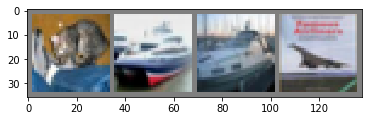

GroundTruth:    cat  ship  ship plane


In [6]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# GroundTruth:    cat  ship  ship plane

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# Accuracy of the network on the 10000 test images: 54 %

Accuracy of the network on the 10000 test images: 55 %


In [8]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 41 %
Accuracy of   car : 74 %
Accuracy of  bird : 41 %
Accuracy of   cat : 51 %
Accuracy of  deer : 40 %
Accuracy of   dog : 50 %
Accuracy of  frog : 69 %
Accuracy of horse : 49 %
Accuracy of  ship : 74 %
Accuracy of truck : 64 %
